
# t-SNE paso a paso (inspirado en StatQuest) con **Iris**

Este notebook ilustra **t‑SNE** (*t-distributed Stochastic Neighbor Embedding*), una técnica de reducción
de dimensionalidad **no lineal** enfocada en preservar **vecindades locales**. Incluye:

- Preparación del dataset y baseline con **PCA 2D**.
- t‑SNE 2D con parámetros clave: **perplexity**, **learning rate**, **init** y **random_state**.
- Comparaciones visuales y recomendaciones prácticas.
- Nota sobre escalabilidad y *best practices*.

**Autor:** DataMining TA‑GPT · **Fecha:** 2025-09-02

> Requisitos: `numpy`, `pandas`, `matplotlib`, `scikit-learn`.


In [1]:

# %% [markdown]
# ## 1. Carga de datos (Iris) y preparación
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Cargar Iris
iris = load_iris()
X = iris.data  # 150 x 4
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Varianza explicada por PCA (2D): 0.958


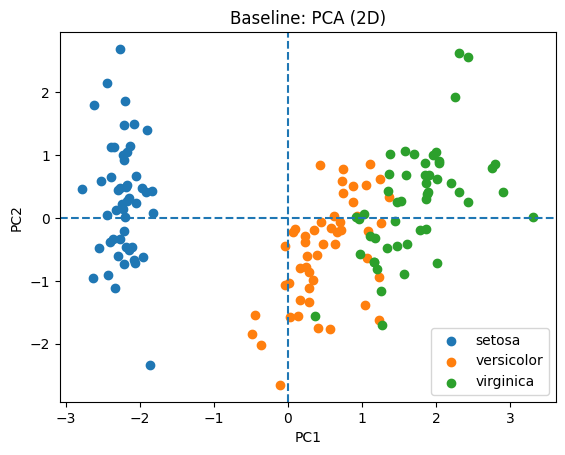

In [2]:

# %% [markdown]
# ## 2. Estandarización y PCA (baseline lineal)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_std)

print("Varianza explicada por PCA (2D):", np.round(pca2.explained_variance_ratio_.sum(), 3))

# Visualización PCA 2D
plt.figure()
for k, name in enumerate(target_names):
    idx = (y == k)
    plt.scatter(X_pca2[idx, 0], X_pca2[idx, 1], label=name)
plt.axhline(0, linestyle="--"); plt.axvline(0, linestyle="--")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("Baseline: PCA (2D)")
plt.legend(); plt.show()


c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


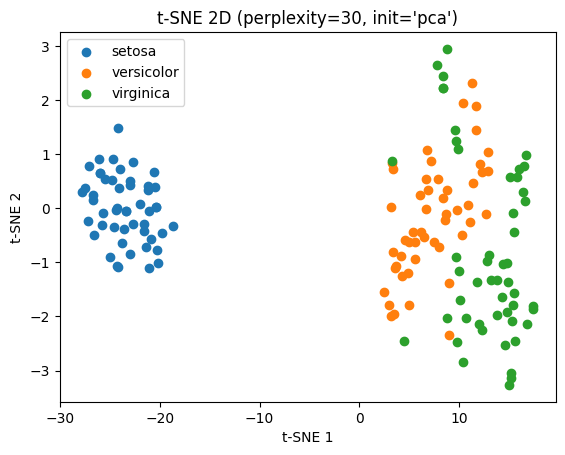

In [3]:

# %% [markdown]
# ## 3. t-SNE básico (2D)
# Parámetros principales:
# - perplexity: tamaño efectivo del vecindario (típ. 5–50)
# - learning_rate: paso de actualización (auto suele funcionar; 10–1000 razonable)
# - init: 'pca' o 'random'
# - n_iter: iteraciones de optimización (>= 1000)
# - random_state: fijar para reproducibilidad
tsne_default = TSNE(n_components=2, perplexity=30, learning_rate='auto',
                    init='pca', n_iter=1000, random_state=42)
X_tsne = tsne_default.fit_transform(X_std)

plt.figure()
for k, name in enumerate(target_names):
    idx = (y == k)
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=name)
plt.title("t-SNE 2D (perplexity=30, init='pca')")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.legend(); plt.show()


c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


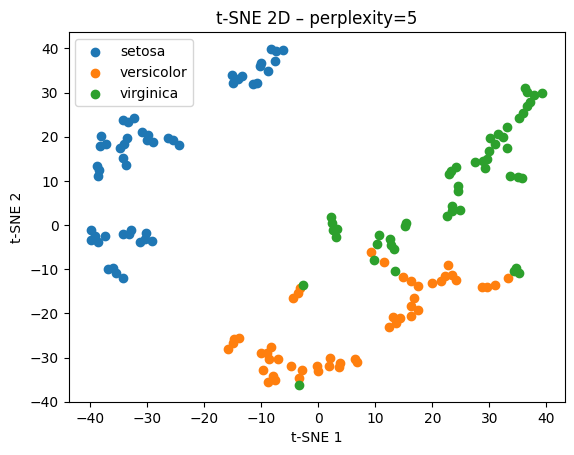

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


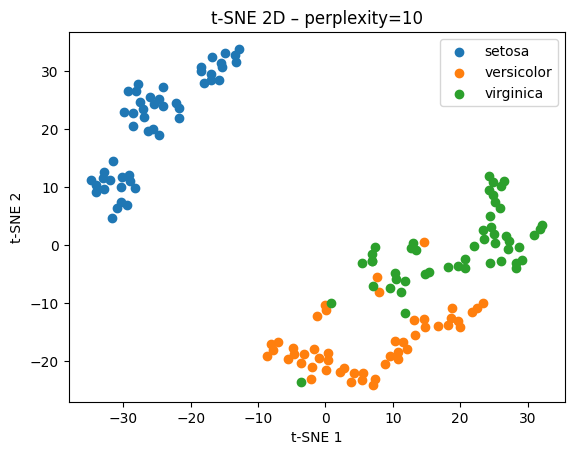

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


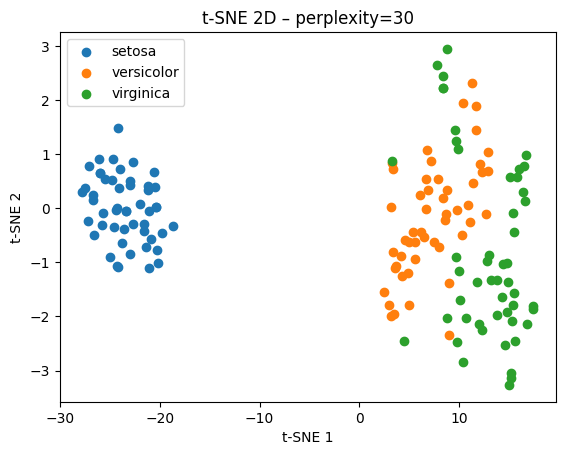

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


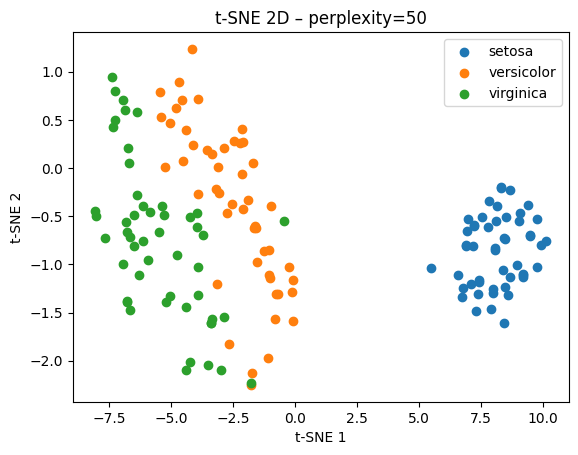

In [4]:

# %% [markdown]
# ## 4. Efecto de la **perplexity**
# Probamos varios valores comunes: 5, 10, 30, 50
for perp in [5, 10, 30, 50]:
    tsne = TSNE(n_components=2, perplexity=perp, learning_rate='auto',
                init='pca', n_iter=1000, random_state=42)
    X_t = tsne.fit_transform(X_std)
    plt.figure()
    for k, name in enumerate(target_names):
        idx = (y == k)
        plt.scatter(X_t[idx, 0], X_t[idx, 1], label=name)
    plt.title(f"t-SNE 2D – perplexity={perp}")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
    plt.legend(); plt.show()


c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


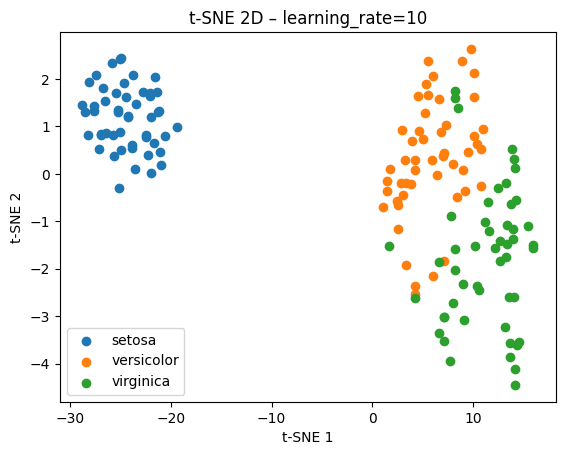

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


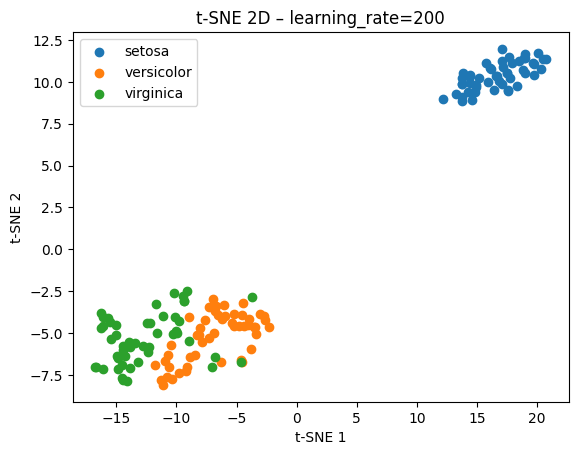

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


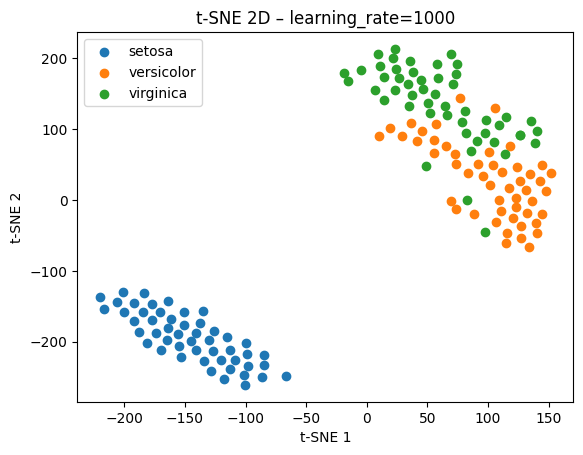

In [5]:

# %% [markdown]
# ## 5. Efecto del **learning rate**
# Valores pequeños pueden atascar la optimización; valores muy grandes generan ruido.
for lr in [10, 200, 1000]:
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=lr,
                init='pca', n_iter=1000, random_state=42)
    X_t = tsne.fit_transform(X_std)
    plt.figure()
    for k, name in enumerate(target_names):
        idx = (y == k)
        plt.scatter(X_t[idx, 0], X_t[idx, 1], label=name)
    plt.title(f"t-SNE 2D – learning_rate={lr}")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
    plt.legend(); plt.show()


c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


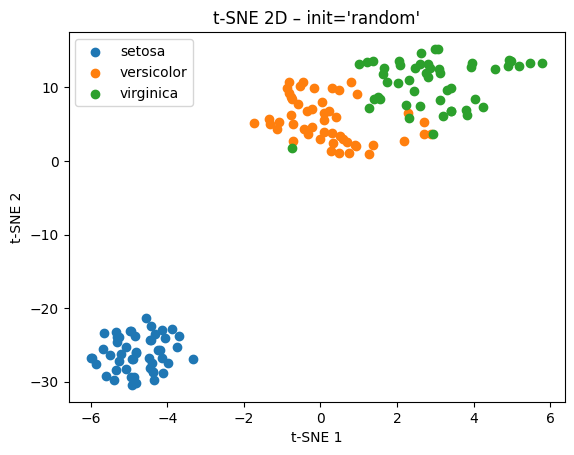

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


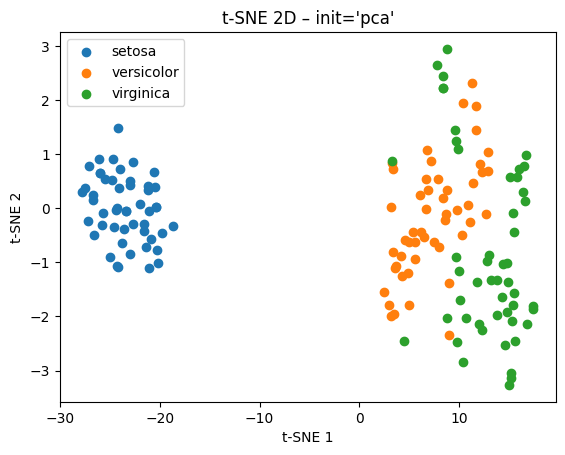

In [6]:

# %% [markdown]
# ## 6. Inicialización: 'random' vs 'pca'
for init in ['random', 'pca']:
    tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto',
                init=init, n_iter=1000, random_state=42)
    X_t = tsne.fit_transform(X_std)
    plt.figure()
    for k, name in enumerate(target_names):
        idx = (y == k)
        plt.scatter(X_t[idx, 0], X_t[idx, 1], label=name)
    plt.title(f"t-SNE 2D – init='{init}'")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
    plt.legend(); plt.show()


c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


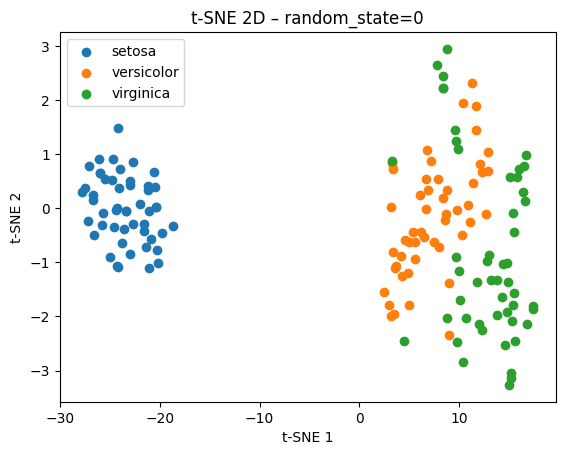

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


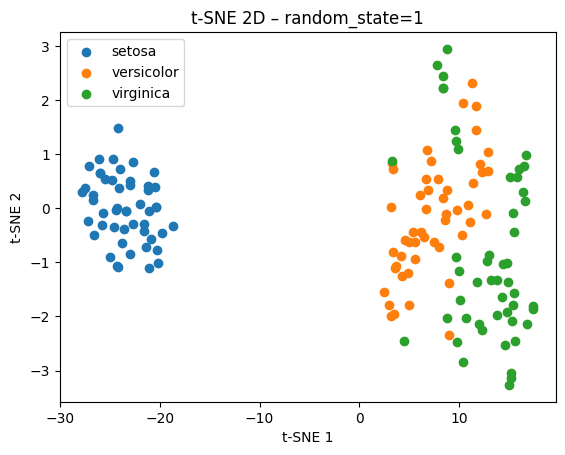

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


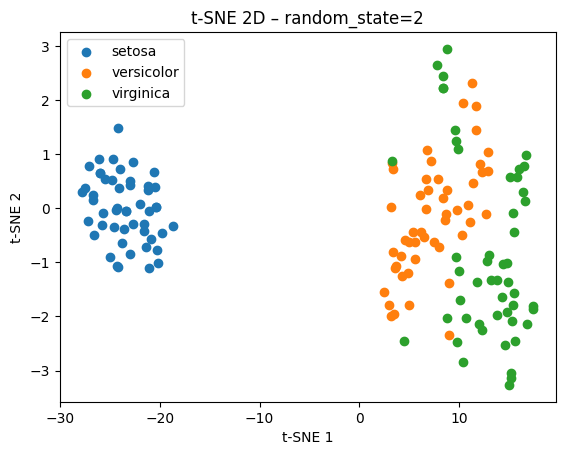

c:\Users\derad\miniconda3\envs\ML\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


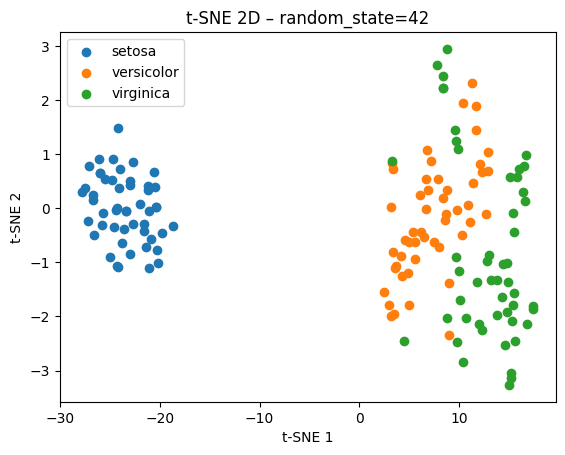

In [7]:

# %% [markdown]
# ## 7. Variabilidad entre distintas semillas
for seed in [0, 1, 2, 42]:
    tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto',
                init='pca', n_iter=1000, random_state=seed)
    X_t = tsne.fit_transform(X_std)
    plt.figure()
    for k, name in enumerate(target_names):
        idx = (y == k)
        plt.scatter(X_t[idx, 0], X_t[idx, 1], label=name)
    plt.title(f"t-SNE 2D – random_state={seed}")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
    plt.legend(); plt.show()



## 8. Consejos prácticos
- **Estandariza** las variables antes de t‑SNE (escala importa).
- Explora **perplexity** en 5–50 y **learning_rate** en 50–500 (o `auto`). 
- Usa `init='pca'` para convergencia más estable en datos con estructura clara.
- t‑SNE **no preserva** distancias globales ni permite proyecciones nuevas fácilmente (no es un modelo paramétrico).
- Para conjuntos más grandes, considera **UMAP** (rápido, paramétrico vía transform) o t‑SNE GPU si está disponible.
- Encadena t‑SNE tras una **PCA previa** (p. ej., a 30–50 dims) en datos de alta dimensión para reducir ruido.



## 9. Lecturas sugeridas
- van der Maaten & Hinton (2008). *Visualizing Data using t‑SNE*.
- Pedregosa et al. (2011). *scikit‑learn: Machine Learning in Python*.
- StatQuest: **t‑SNE claramente explicado** (video).  <!-- Referencia recomendada, verificar autor y año -->
